In [1]:
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer

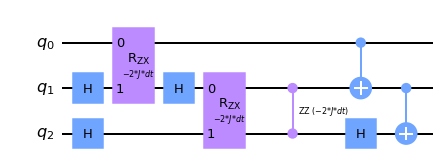

In [8]:
# Latex-like symbols only supported by current versions of my PR 6899 (in template optimization)
JJ = Parameter('$J$') # exchange coupling strength
hh = Parameter('$h$') # transverse magnetic field
dt = Parameter('$dt$') # Trotter step size
TT = Parameter('$T$') # total time

qc = QuantumCircuit(3)
qc.h(1)
qc.rzx(-2*JJ*dt, 0, 1)
qc.h(1)
qc.h(2)
qc.rzx(-2*JJ*dt, 1, 2)
qc.rzz(-2*JJ*dt, 1, 2)
qc.h(2)
qc.cnot(0, 1)
qc.cnot(1, 2)
qc.draw(output='mpl')

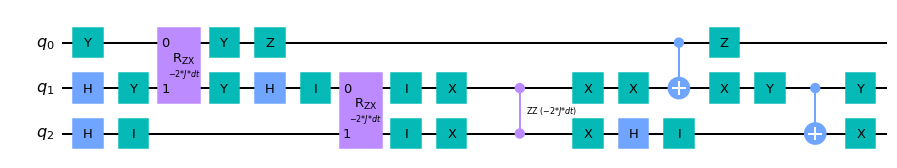

In [10]:
from qiskit_research.utils.pauli_twirling import add_pauli_twirls
twirled_circs = add_pauli_twirls(qc, 10)
twirled_circs[0].draw(output='mpl')

In [11]:
import qiskit.tools.jupyter
%qiskit_version_table